In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import glob
import pickle

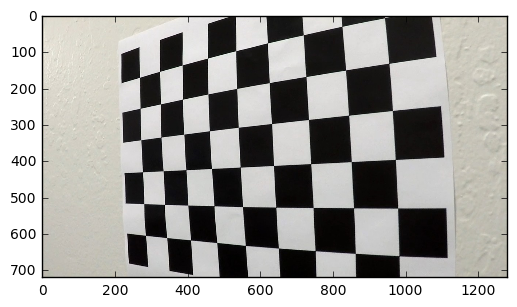

In [2]:
img = mpimg.imread('camera_cal/calibration4.jpg')
img_size = (img.shape[1], img.shape[0])
plt.imshow(img)
plt.show()

In [3]:
# Arrays to store object points and image points from all the images

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plnae

# Inner corners
inner_x = 7
inner_y = 5

for x in range(3, 10):
    for y in range(3, 8):
        
        print("x: ", x, "y: ", y)
        inner_x = x
        inner_y = y
        
        # Prepare object points, like (0,0,0), (1,0,0), (2,0,0), ..., (7,5,0)
        objp = np.zeros((inner_y*inner_x, 3), np.float32)
        objp[:,:2] = np.mgrid[0:inner_x, 0:inner_y].T.reshape(-1,2) # x, y coordinates

        # Convert image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        ret, corners = cv2.findChessboardCorners(gray, (inner_x, inner_y), None)

        # If corners are found, add object points, image points
        if ret == True:
            print ("Corners Found")
            imgpoints.append(corners)
            objpoints.append(objp)

            # draw and display the corners
            img = cv2.drawChessboardCorners(img, (inner_x, inner_y), corners, ret)
            plt.imshow(img)
            plt.show()


x:  3 y:  3
x:  3 y:  4
x:  3 y:  5
x:  3 y:  6
x:  3 y:  7
x:  4 y:  3
x:  4 y:  4
x:  4 y:  5
x:  4 y:  6
x:  4 y:  7
x:  5 y:  3
x:  5 y:  4
x:  5 y:  5
x:  5 y:  6
x:  5 y:  7
x:  6 y:  3
x:  6 y:  4
x:  6 y:  5
x:  6 y:  6
x:  6 y:  7
x:  7 y:  3
x:  7 y:  4
x:  7 y:  5
x:  7 y:  6
x:  7 y:  7
x:  8 y:  3
x:  8 y:  4
x:  8 y:  5
x:  8 y:  6
x:  8 y:  7
x:  9 y:  3
x:  9 y:  4
x:  9 y:  5
x:  9 y:  6
x:  9 y:  7


## 1. Compute the camera calibration matrix and distortion coefficients

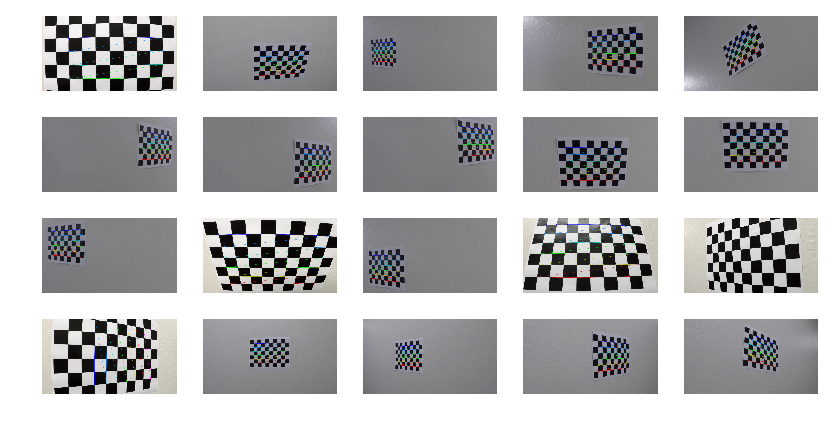

In [4]:
images = glob.glob('camera_cal/calibration*.jpg')

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plnae

inner_x = 9
inner_y = 6

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0), ..., (7,5,0)
objp0 = np.zeros((inner_y*inner_x, 3), np.float32)
objp0[:,:2] = np.mgrid[0:inner_x, 0:inner_y].T.reshape(-1,2) # x, y coordinates

objp1 = np.zeros((8*4, 3), np.float32)
objp1[:,:2] = np.mgrid[0:8, 0:4].T.reshape(-1,2) # x, y coordinates

objp2 = np.zeros((6*7, 3), np.float32)
objp2[:,:2] = np.mgrid[0:6, 0:7].T.reshape(-1,2) # x, y coordinates

plt.figure(figsize = (10,5))
plt.axis('off')

i = 1
for fname in images:
    plt.subplot(4, 5, i)
    i += 1
    
    # read in each image
    img = mpimg.imread(fname)
    # new image set found corners ret=return value to False
    ret = False

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners with default inner x, y corners   
    ret, corners = cv2.findChessboardCorners(gray, (inner_x, inner_y), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp0)
        
        # draw and display the corners
        img = cv2.drawChessboardCorners(img, (inner_x, inner_y), corners, ret)
        plt.imshow(img)
    else:
        
        # Try different inner corner x, y combo
        if not ret:
            nx = 8
            ny = 4
            ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
            objp = objp1
            
        if not ret:
            nx = 6
            ny = 7
            ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
            objp = objp2
            
        if ret:    
            imgpoints.append(corners)
            objpoints.append(objp)
            # draw and display the corners
            img = cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            plt.imshow(img)
        else:
            plt.imshow(img)
        
    plt.axis('off')


In [5]:
# http://docs.opencv.org/2.4.1/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html
# Get mtx=cameraMatrix, dist=distortionCoefs, rvecs=rotationVectors, tvec=translationVectors
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

## 2. Apply the Distortion Correction to Raw Images

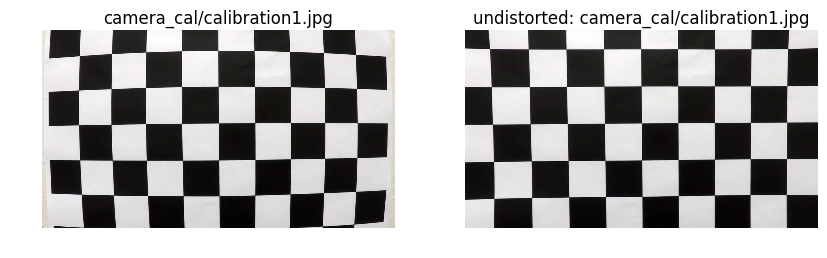

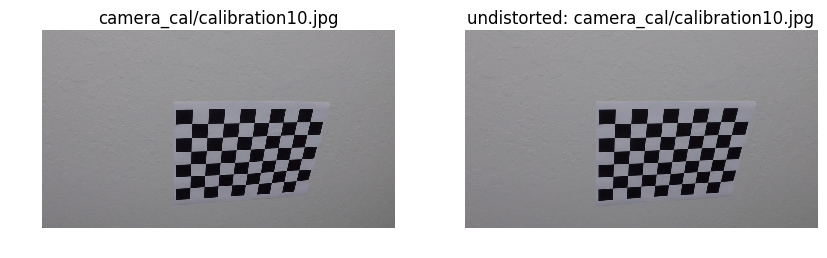

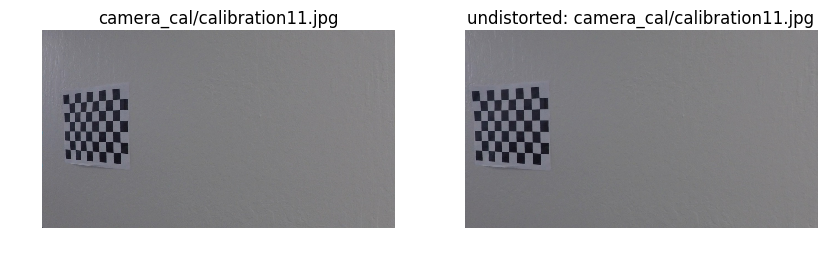

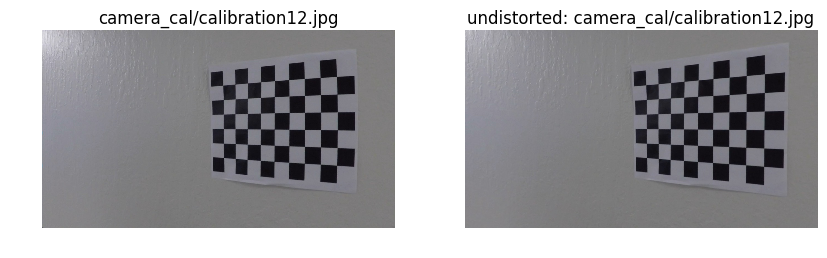

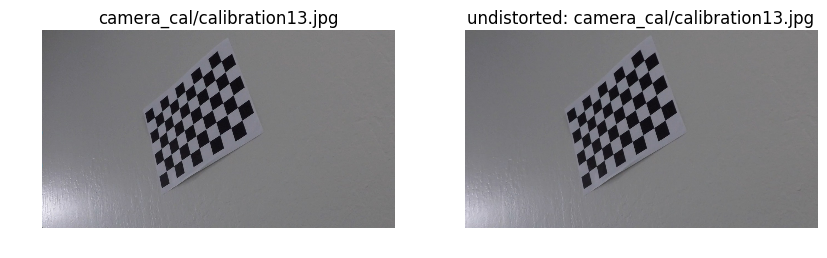

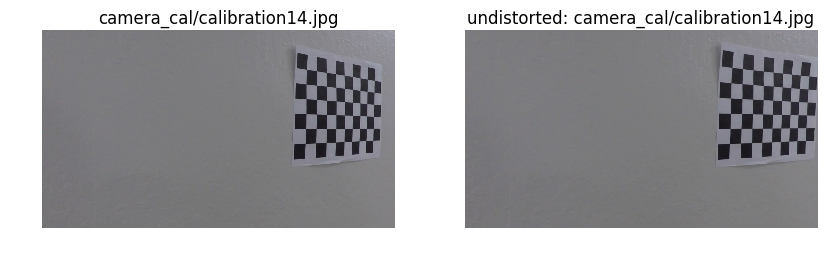

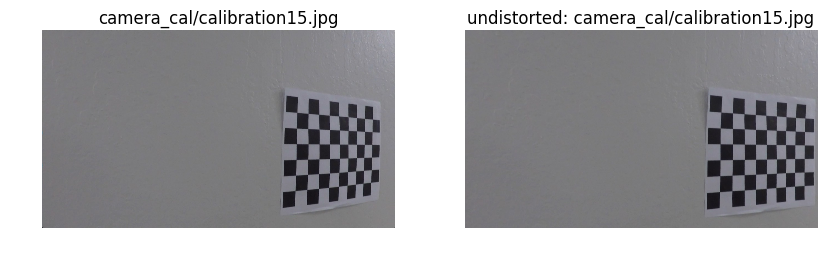

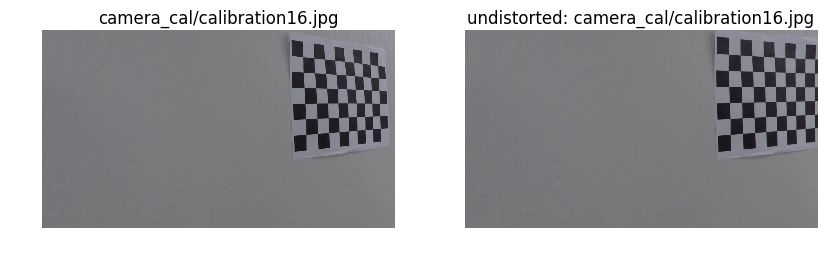

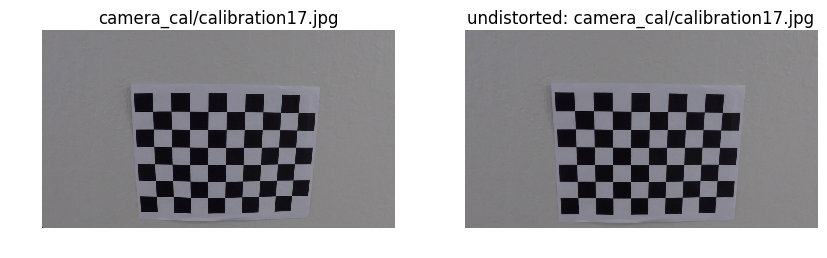

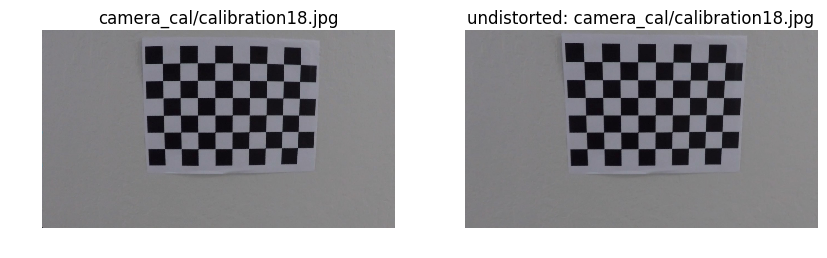

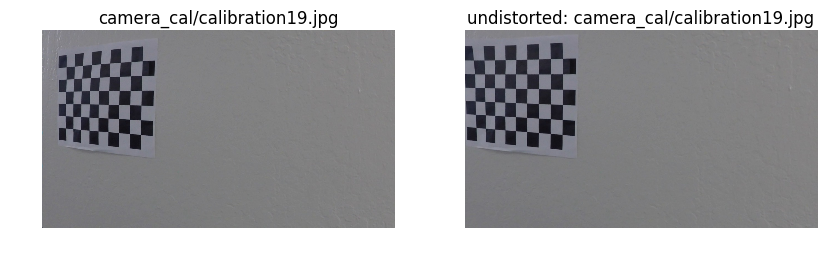

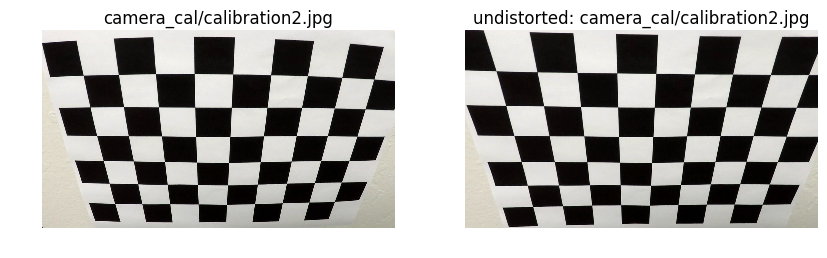

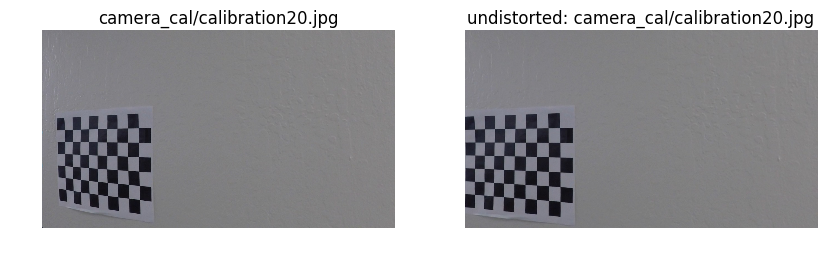

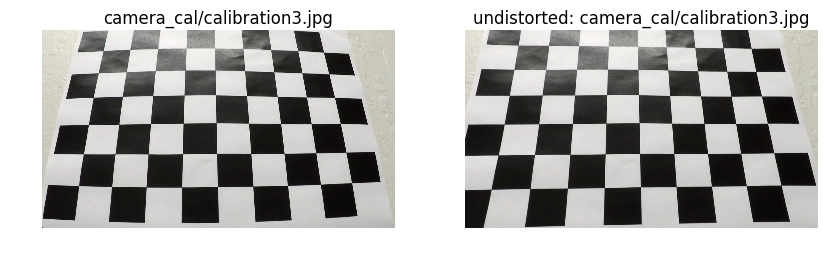

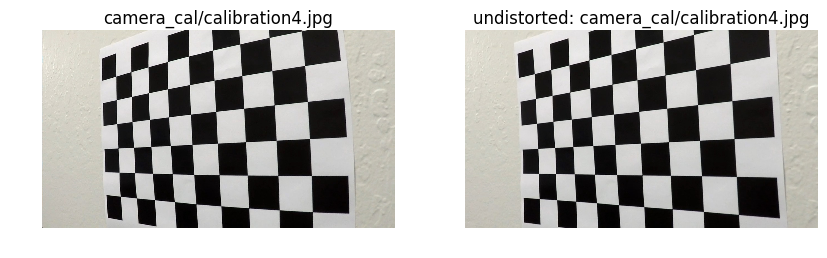

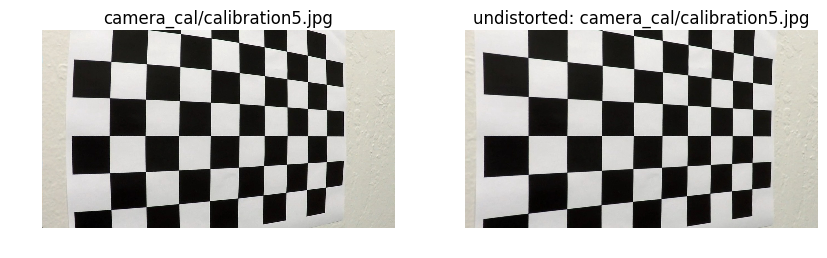

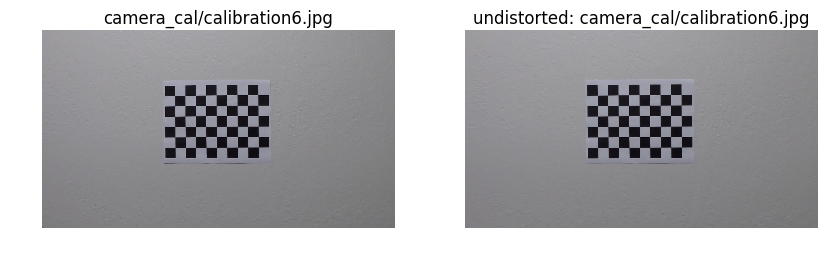

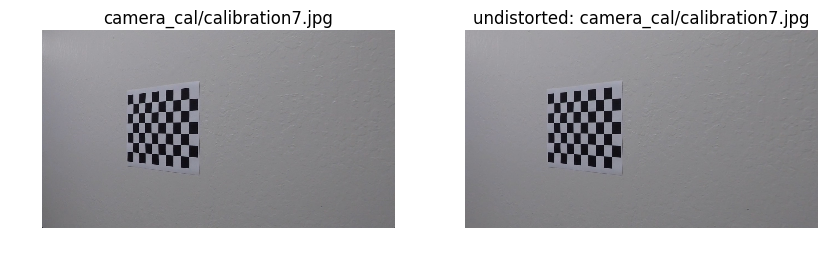

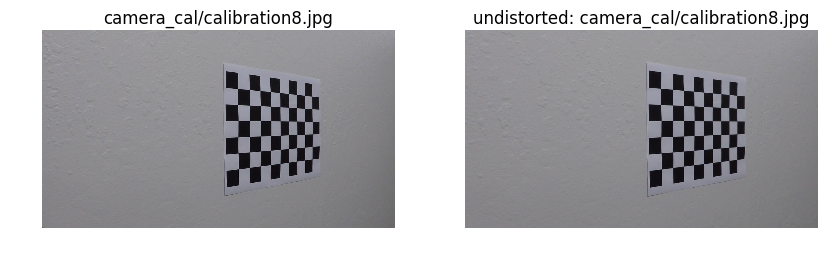

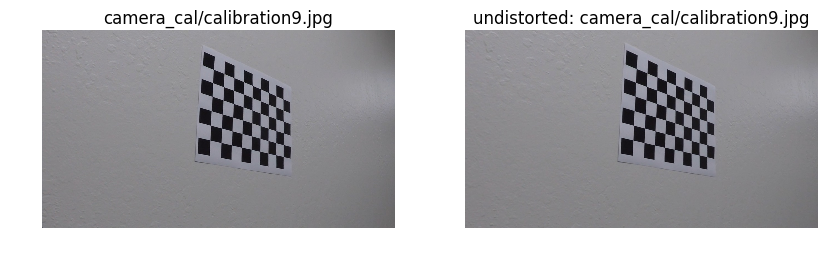

In [6]:
i = 1
for fname in images:
    plt.figure(figsize = (10, 5))
    
    plt.subplot(1, 2, 1)
    i += 1
    
    # read in each image
    img = mpimg.imread(fname)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
    plt.imshow(undistort_img)
    plt.title("undistorted: " + fname)
    plt.axis('off')

In [7]:
calibration_data = [mtx, dist, img_size]
pickle.dump(calibration_data, open( "cameraCalibration.pkl", "wb" ) )

In [8]:
mtx

array([[  1.15518438e+03,   0.00000000e+00,   6.64005723e+02],
       [  0.00000000e+00,   1.15016055e+03,   3.91125901e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [9]:
dist

array([[ -2.34630505e-01,  -4.83682705e-02,  -6.02750533e-04,
          4.92875355e-05,  -1.14052109e-02]])

In [10]:
img_size

(1280, 720)